In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler, LabelEncoder, PolynomialFeatures, KBinsDiscretizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 

In [2]:
data_diamonds = pd.read_csv("data/diamonds.csv", index_col= 0) 

In [74]:
data_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


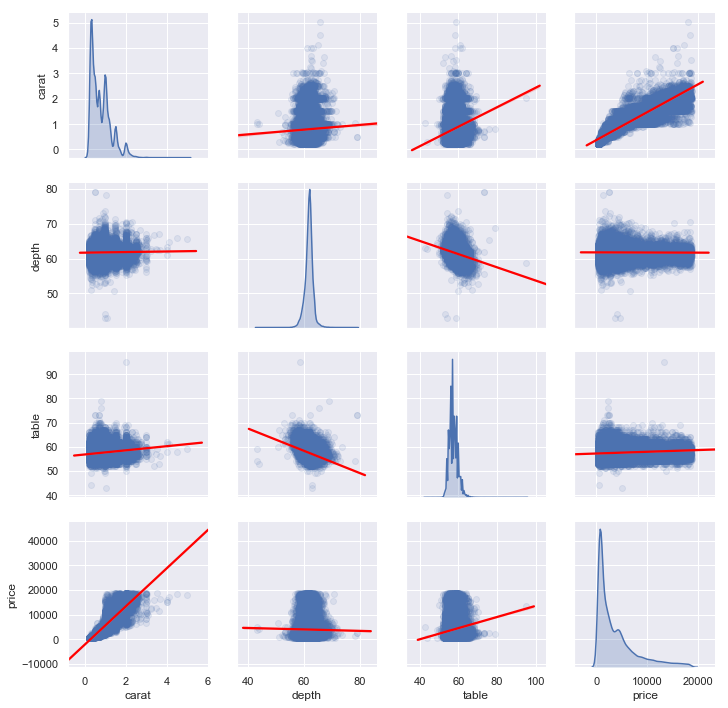

In [3]:
sns.set()
sns.pairplot(data_diamonds.iloc[:,:-3], kind='reg', diag_kind="kde",  plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

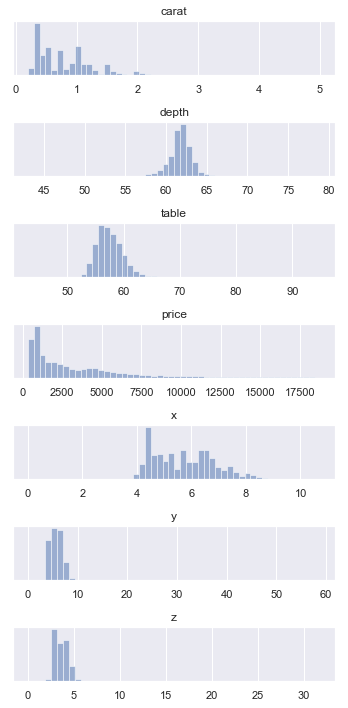

In [4]:
fig, axes = plt.subplots(7, 1, figsize=(5, 10))
ax = axes.ravel()
for i,j in enumerate([0,4,5,6,7,8,9]):
    f, bins = np.histogram(data_diamonds.iloc[:, j], bins=50)
    ax[i].hist(data_diamonds.iloc[:, j], bins=bins, alpha=.5)
    ax[i].set_title(data_diamonds.columns.values[j])
    ax[i].set_yticks(())
fig.tight_layout()

##### Удалим выбросы и нули по x, y, z

In [7]:
display(data_diamonds[data_diamonds.y>10])
data_wo_out = data_diamonds[data_diamonds.y<=10]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [8]:
display(data_diamonds[data_diamonds.z>6])
data_wo_out = data_wo_out[data_wo_out.z<=6]

,carat,cut,color,clarity,depth,table,price,x,y,z
23645,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
24329,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
26195,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.84,6.16
26432,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27
26445,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
26535,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13
27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43


In [9]:
display(data_diamonds[(data_diamonds['x']==0) | (data_diamonds['y']==0) | (data_diamonds['z']==0)])
data_wo_out = data_wo_out[~(data_wo_out['x']==0) & ~(data_wo_out['y']==0) & ~(data_wo_out['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [10]:
data_wo_out.describe()

,carat,depth,table,price,x,y,z
count,53905.000000,53905.000000,53905.000000,53905.000000,53905.000000,53905.000000,53905.000000
mean,0.797022,61.749025,57.456893,3928.242593,5.730708,5.732549,3.538790
std,0.471617,1.431737,2.233881,3983.527373,1.117866,1.109789,0.690439
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5320.000000,6.540000,6.540000,4.030000
max,3.240000,79.000000,95.000000,18823.000000,9.540000,9.460000,5.980000


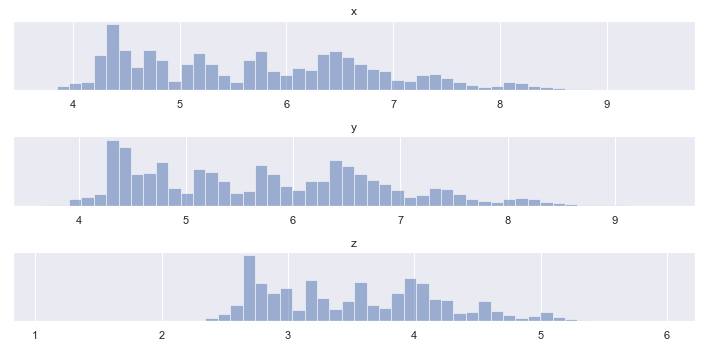

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(10, 5))
ax = axes.ravel()
for i,j in enumerate([7,8,9]):
    f, bins = np.histogram(data_wo_out.iloc[:, j], bins=50)
    ax[i].hist(data_wo_out.iloc[:, j], bins=bins, alpha=.5)
    ax[i].set_title(data_wo_out.columns.values[j])
    ax[i].set_yticks(())
fig.tight_layout()

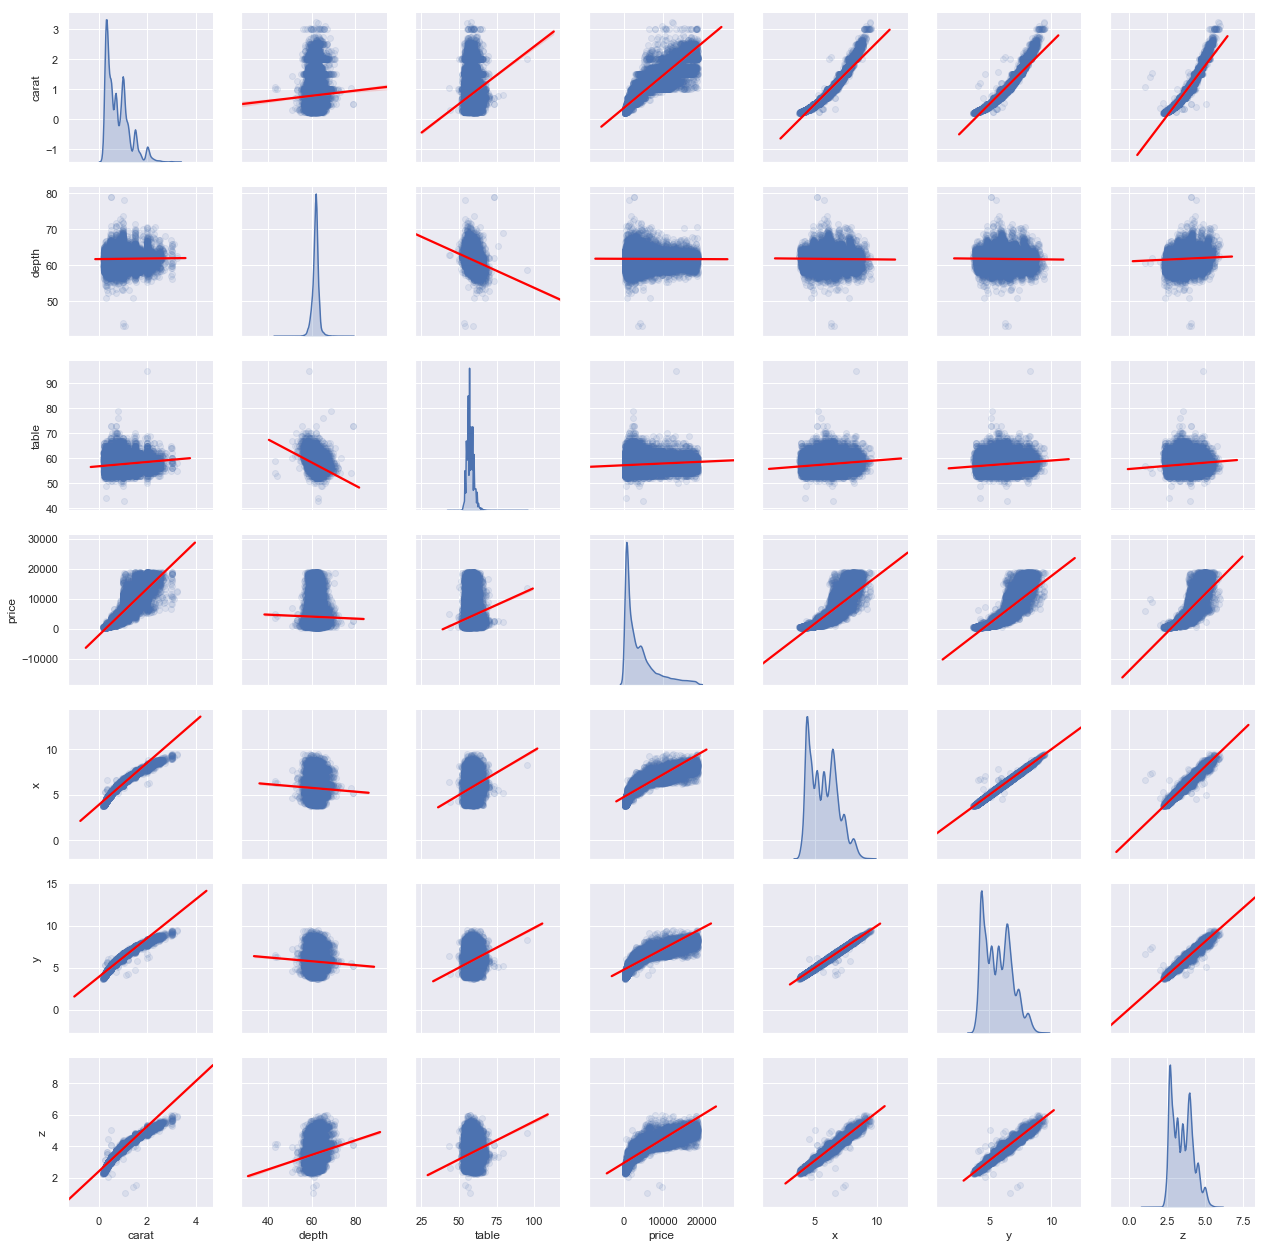

In [12]:
sns.set()
sns.pairplot(data_wo_out, kind='reg', diag_kind="kde",  plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

##### Создадим фичи объем и плотность алмаза

In [9]:
data_wo_out['volume'] = data_wo_out['x']*data_wo_out['y']*data_wo_out['z']

In [10]:
data_wo_out['density'] = data_wo_out['carat'] /data_wo_out['volume'] 

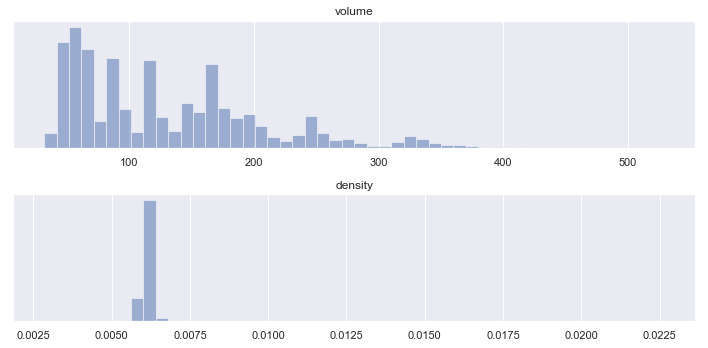

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
ax = axes.ravel()
for i,j in enumerate([-2,-1]):
    f, bins = np.histogram(data_wo_out.iloc[:, j], bins=50)
    ax[i].hist(data_wo_out.iloc[:, j], bins=bins, alpha=.5)
    ax[i].set_title(data_wo_out.columns.values[j])
    ax[i].set_yticks(())
fig.tight_layout()

##### Пометим алмазы с сомнительной плотностью

In [12]:
data_wo_out['bad'] = (data_wo_out['density'] < 0.0055)|(data_wo_out['density'] > 0.007)

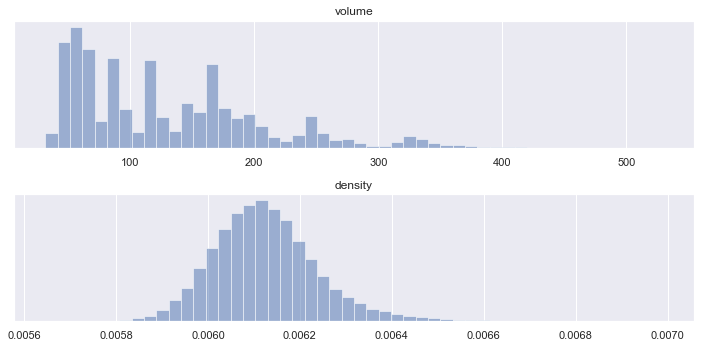

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
ax = axes.ravel()
for i,j in enumerate([-3,-2]):
    f, bins = np.histogram(data_wo_out[data_wo_out['bad'] == False].iloc[:, j], bins=50)
    ax[i].hist(data_wo_out[data_wo_out['bad'] == False].iloc[:, j], bins=bins, alpha=.5)
    ax[i].set_title(data_wo_out[data_wo_out['bad'] == False].columns.values[j])
    ax[i].set_yticks(())
fig.tight_layout()

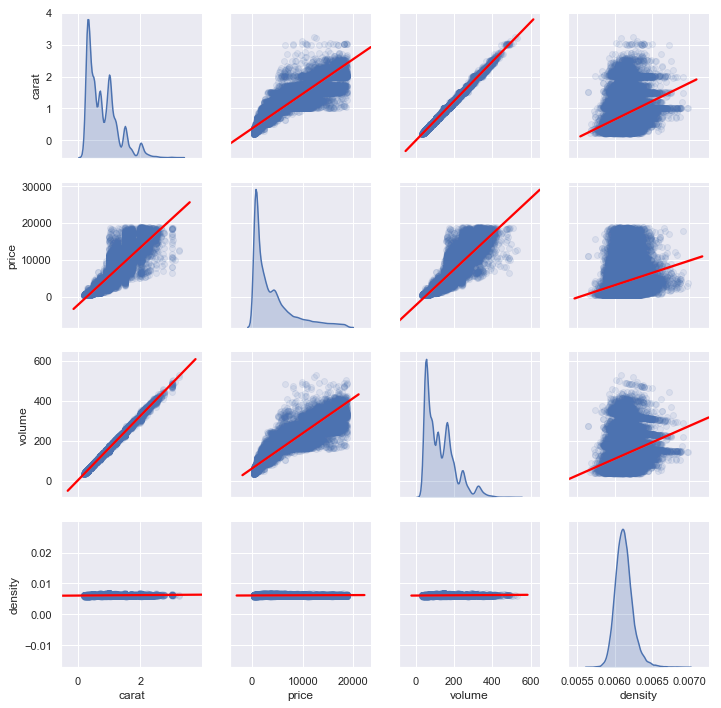

In [18]:
sns.set()
sns.pairplot(data_wo_out[data_wo_out['bad'] == False].drop(columns=['x','y','z', 'depth','table', 'bad']), kind='reg', diag_kind="kde",  plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

In [14]:
data_wo_out['bad'] = pd.get_dummies(data_wo_out['bad'],drop_first=True)

#### [Создадим факторные переменные  ](https://ggplot2.tidyverse.org/reference/diamonds.html)

##### Качество огранки (Fair, Good, Very Good, Premium, Ideal)

In [15]:
data_wo_out['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [16]:
data_wo_out['cut'] = data_wo_out['cut'].replace({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})

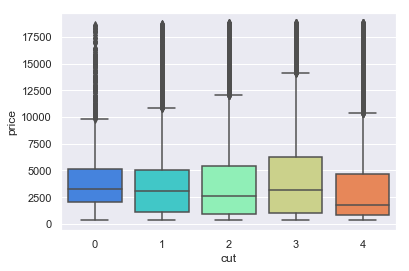

In [17]:
sns.boxplot(x='cut',y='price',data=data_wo_out,palette='rainbow')

##### Прозрачность (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
    

In [18]:
data_wo_out['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [19]:
data_wo_out['clarity'] = data_wo_out['clarity'].replace({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

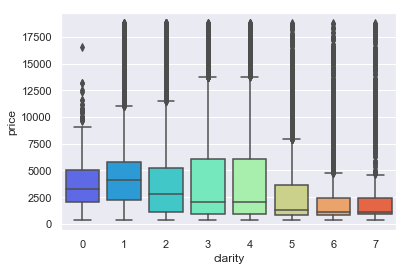

In [20]:
sns.boxplot(x='clarity',y='price',data=data_wo_out,palette='rainbow')

#####  Цвет (J (worst) to D (best))

In [21]:
data_wo_out['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

##### [Дамми по группам цвета](https://awesomegems.com/diamondfacts.html)

-  D-F - the finest & brightest colorless diamonds, usually for the discriminating customer who can afford the most beautiful and the rare.
- G-H - very white & bright face-up, near colorless diamonds that are not as expensive, and when mounted in jewelry it is difficult to see the the difference between these and the higher color grades.
- I-J - not quite as bright or have very slight hardly noticeable tint.


In [22]:
data_wo_out['color_group'] = data_wo_out['color'].replace({'D':2,'E':2,'F':2,'G':1,'H':1,'I':0,'J':0})

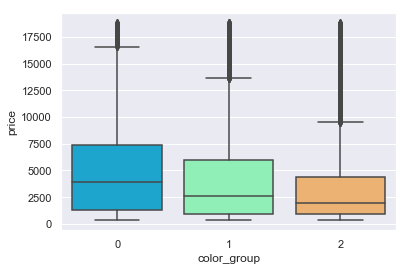

In [23]:
sns.boxplot(x='color_group',y='price',data=data_wo_out,palette='rainbow')

In [24]:
data_wo_out['color'] = data_wo_out['color'].replace({'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0})

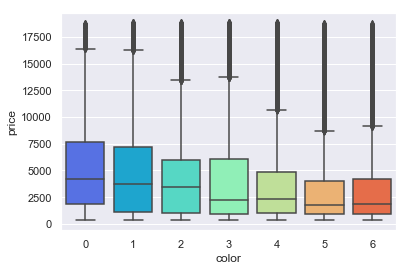

In [25]:
sns.boxplot(x='color',y='price',data=data_wo_out,palette='rainbow')

In [26]:
dumdum = pd.get_dummies(data_wo_out['color_group'], drop_first=True)

In [27]:
data_wo_out = pd.concat([data_wo_out,dumdum], axis=1)

#####  Создадим бины по весу

In [28]:
data_ext = data_wo_out.copy()

In [29]:
np.array(data_ext['carat']).reshape(1, -1)

array([[0.23, 0.21, 0.23, ..., 0.7 , 0.86, 0.75]])

In [30]:
kb_ord = KBinsDiscretizer(n_bins=20, strategy='kmeans', encode='ordinal')
kb_ord.fit(data_ext[['carat']])
data_ord = kb_ord.transform(data_ext[['carat']])
data_ord[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [31]:
pd.value_counts(pd.Series(data_ord.flatten()))

0.0     11058
5.0      7983
2.0      7321
3.0      6520
1.0      6508
6.0      3500
4.0      3356
8.0      2632
7.0      1311
11.0     1211
9.0       767
10.0      757
12.0      432
13.0      243
14.0      143
15.0       95
18.0       26
16.0       24
17.0       15
19.0        3
dtype: int64

In [32]:
data_ext['carat_ord'] = data_ord

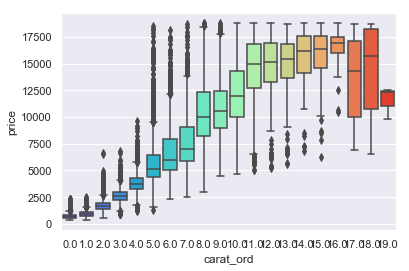

In [33]:
sns.boxplot(x='carat_ord',y='price',data=data_ext,palette='rainbow')

##### Комбинация качеств

In [34]:
data_wo_out['score'] = 2*data_wo_out['cut'] + data_wo_out['color'] + data_wo_out['clarity']

In [35]:
data_ext['score_2'] = 2*data_ext['cut'] + data_ext['color'] + data_wo_out['clarity'] + data_ext['carat_ord']/3

In [36]:
data_ext['score_3'] = (2*data_ext['cut'] + data_ext['color'] + data_wo_out['clarity'])*data_ext['carat_ord']

In [37]:
data_ext.shape

(53905, 19)

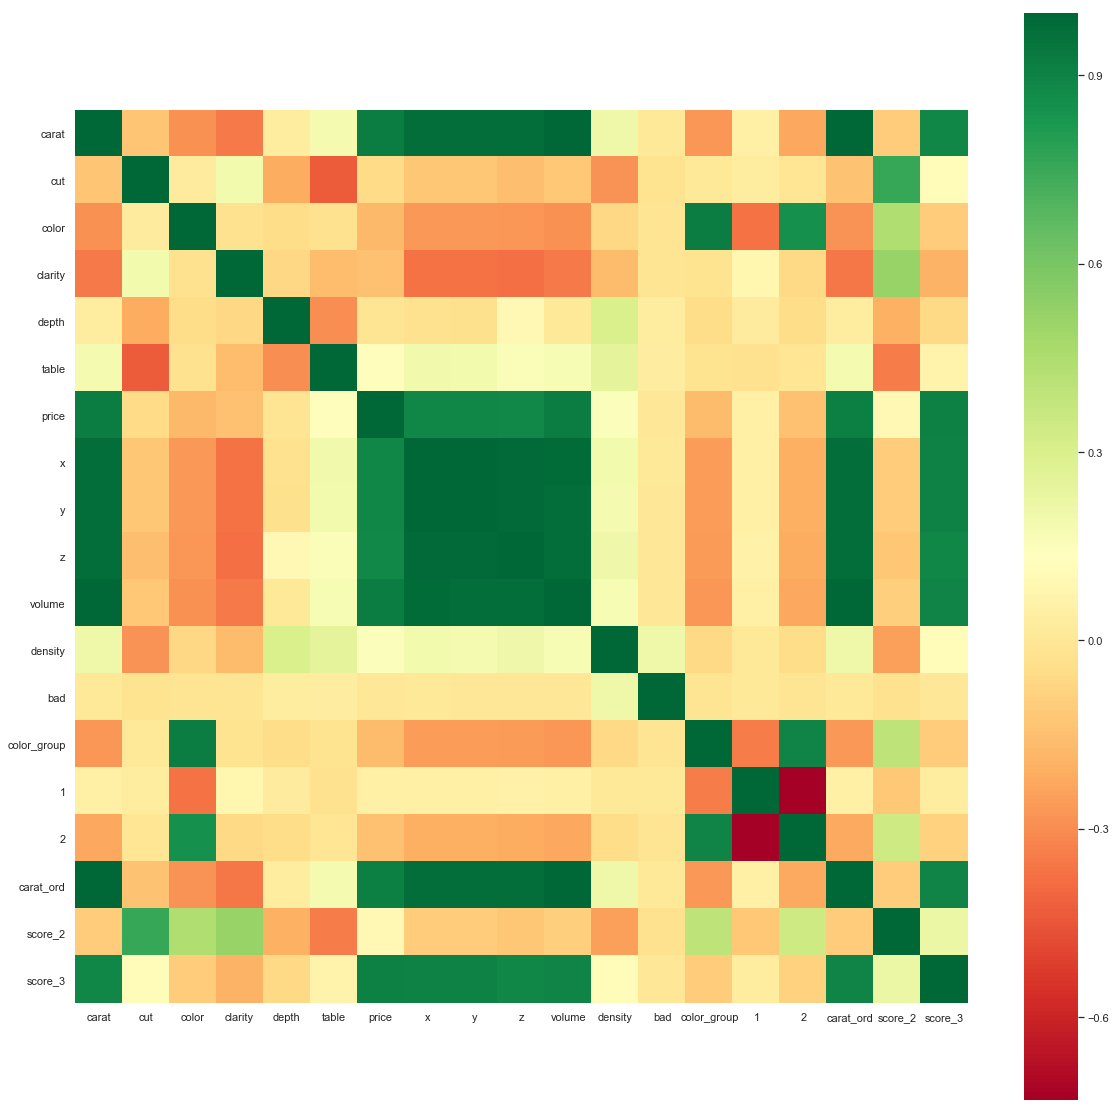

In [38]:
plt.figure(figsize=(20,20)) 
sns.heatmap(data_ext.corr(), cmap='RdYlGn',square=True);  

#####  Создадим полиномиальные фичи

In [39]:
num_feat = ['carat', 'volume', 'density', 'depth', 'table']

In [40]:
for i in num_feat:
    data_ext[i+'_log'] = np.log(data_ext[i])

In [41]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(data_ext[num_feat])
data_poly = poly.transform(data_ext[num_feat])
data_poly = pd.DataFrame(data_poly)
data_poly.columns = poly.get_feature_names()
data_poly.index = data_ext.index

In [42]:
data_ext = pd.concat([data_ext, data_poly.iloc[:,5:]], axis=1)

#### Выбираем линейную модель

In [49]:
data_ext = shuffle(data_ext) # always shuffle your data to avoid any biases that may emerge b/c of some order.

In [50]:
Y = data_ext['price']
X = data_ext.drop(columns=['price'])

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [52]:
pipe = Pipeline([('linmod', LinearRegression())])

param_grid = [{'linmod': [LinearRegression()],
               'linmod__fit_intercept': [True, False]},
              {'linmod': [Ridge()],
               'linmod__alpha': [10**(x-5) for x in np.linspace(start = 1, stop = 10, num = 10)],
               'linmod__normalize': [True, False]},
              {'linmod': [Lasso()],
               'linmod__alpha': [10**(x-5) for x in np.linspace(start = 1, stop = 10, num = 10)],
               'linmod__normalize': [True, False]}
             ]

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [57]:
ms_error = make_scorer(mean_squared_error, greater_is_better=False)

In [58]:
grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, iid=True, scoring = ms_error)
grid.fit(X_train,Y_train)

/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.62242e-23): result may not be accurate.
  overwrite_a=True).T
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.6248e-23): result may not be accurate.
  overwrite_a=True).T
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.61777e-23): result may not be accurate.
  overwrite_a=True).T
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.61946e-23): result may not be accurate.
  overwrite_a=True).T
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.6165e-23): result may not be accurate.
  overwrite_a=True).T
/home/xenakas/anaconda

/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.61663e-19): result may not be accurate.
  overwrite_a=True).T
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.61829e-19): result may not be accurate.
  overwrite_a=True).T
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.61536e-19): result may not be accurate.
  overwrite_a=True).T
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.59277e-19): result may not be accurate.
  overwrite_a=True).T
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.62951e-19): result may not be accurate.
  overwrite_a=True).T
/home/xenakas/anacon

/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('linmod', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid=True, n_jobs=None,
       param_grid=[{'linmod': [LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)], 'linmod__fit_intercept': [True, False]}, {'linmod': [Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001...0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0], 'linmod__normalize': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [71]:
print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(-grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(-grid.score(X_test, Y_test)))
gridresults = pd.DataFrame(grid.cv_results_)
gridresults[gridresults.columns.values[[x.startswith('split') for x in gridresults.columns.values]]] = - gridresults[gridresults.columns.values[[x.startswith('split') for x in gridresults.columns.values]]]
gridresults[gridresults.columns.values[[x.startswith('mean_t') for x in gridresults.columns.values]]] = - gridresults[gridresults.columns.values[[x.startswith('mean_t') for x in gridresults.columns.values]]]
display(gridresults.sort_values(["rank_test_score"]).T)

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'linmod': Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001), 'linmod__alpha': 0.0001, 'linmod__normalize': False}

Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 880453.300386

Правильность для наилучшей модели на тестовом наборе: 975567.517342



,3,15,2,29,4,5,27,25,31,17,...,14,16,1,18,20,34,38,40,36,0
mean_fit_time,0.0870768,0.112858,0.0923362,1.1092,0.119548,0.113223,1.12787,1.2064,1.05434,0.0866616,...,0.11571,0.101926,0.148768,0.0919133,0.102695,0.0656925,0.0801252,0.0847923,0.0751622,0.139933
std_fit_time,0.0260901,0.00833272,0.0210246,0.0199038,0.0162802,0.00550288,0.0267709,0.0352419,0.0169257,0.020699,...,0.00476682,0.0203657,0.0168262,0.0246329,0.018471,0.0211199,0.0252852,0.0251136,0.0229122,0.0175411
mean_score_time,0.00503685,0.0129421,0.00512772,0.00324786,0.00828302,0.00730698,0.00344677,0.00417094,0.00250254,0.00374701,...,0.00892594,0.00912549,0.00494733,0.00933931,0.0065124,0.00330615,0.00414815,0.00300651,0.00250826,0.00478654
std_score_time,0.0063176,0.00627887,0.00467248,0.00322698,0.000425505,0.000998652,0.00310152,0.00398508,0.00242946,0.00322295,...,0.000945417,0.00806252,0.00395135,0.00829147,0.0026958,0.00140354,0.00276041,0.00192865,0.00121191,0.00390391
param_linmod,"Ridge(alpha=0.0001, copy_X=True, fit_intercept...","Ridge(alpha=0.0001, copy_X=True, fit_intercept...","Ridge(alpha=0.0001, copy_X=True, fit_intercept...","Lasso(alpha=100000.0, copy_X=True, fit_interce...","Ridge(alpha=0.0001, copy_X=True, fit_intercept...","Ridge(alpha=0.0001, copy_X=True, fit_intercept...","Lasso(alpha=100000.0, copy_X=True, fit_interce...","Lasso(alpha=100000.0, copy_X=True, fit_interce...","Lasso(alpha=100000.0, copy_X=True, fit_interce...","Ridge(alpha=0.0001, copy_X=True, fit_intercept...",...,"Ridge(alpha=0.0001, copy_X=True, fit_intercept...","Ridge(alpha=0.0001, copy_X=True, fit_intercept...","LinearRegression(copy_X=True, fit_intercept=Fa...","Ridge(alpha=0.0001, copy_X=True, fit_intercept...","Ridge(alpha=0.0001, copy_X=True, fit_intercept...","Lasso(alpha=100000.0, copy_X=True, fit_interce...","Lasso(alpha=100000.0, copy_X=True, fit_interce...","Lasso(alpha=100000.0, copy_X=True, fit_interce...","Lasso(alpha=100000.0, copy_X=True, fit_interce...","LinearRegression(copy_X=True, fit_intercept=Fa..."
param_linmod__fit_intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,True
param_linmod__alpha,0.0001,100,0.0001,0.1,0.001,0.001,0.01,0.001,1,1000,...,100,1000,NaN,10000,100000,100,10000,100000,1000,NaN
param_linmod__normalize,False,False,True,False,True,False,False,False,False,False,...,True,True,NaN,True,True,True,True,True,True,NaN
params,"{'linmod': Ridge(alpha=0.0001, copy_X=True, fi...","{'linmod': Ridge(alpha=0.0001, copy_X=True, fi...","{'linmod': Ridge(alpha=0.0001, copy_X=True, fi...","{'linmod': Lasso(alpha=100000.0, copy_X=True, ...","{'linmod': Ridge(alpha=0.0001, copy_X=True, fi...","{'linmod': Ridge(alpha=0.0001, copy_X=True, fi...","{'linmod': Lasso(alpha=100000.0, copy_X=True, ...","{'linmod': Lasso(alpha=100000.0, copy_X=True, ...","{'linmod': Lasso(alpha=100000.0, copy_X=True, ...","{'linmod': Ridge(alpha=0.0001, copy_X=True, fi...",...,"{'linmod': Ridge(alpha=0.0001, copy_X=True, fi...","{'linmod': Ridge(alpha=0.0001, copy_X=True, fi...","{'linmod': LinearRegression(copy_X=True, fit_i...","{'linmod': Ridge(alpha=0.0001, copy_X=True, fi...","{'linmod': Ridge(alpha=0.0001, copy_X=True, fi...","{'linmod': Lasso(alpha=100000.0, copy_X=True, ...","{'linmod': Lasso(alpha=100000.0, copy_X=True, ...","{'linmod': Lasso(alpha=100000.0, copy_X=True, ...","{'linmod': Lasso(alpha=100000.0, copy_X=True, ...","{'linmod': LinearRegression(copy_X=True, fit_i..."
split0_test_score,848504,833361,835027,845250,846107,850527,845886,845475,846064,838275,...,8.60001e+06,1.40516e+07,1.0884e+07,1.49586e+07,1.5055e+07,1.50658e+07,1.50658e+07,1.50658e+07,1.50658e+07,1.2511e+07
